In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
from MulticoreTSNE import MulticoreTSNE as TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import csv
import gzip
import anndata as ad
from pathlib import Path
import glob
import seaborn as sns


In [2]:
#Create folders
#import os

#parent_directory = "/Users/lidiayung/project/specimens/"

# create three subdirectories under parent_directory
#folders = ['SF10099_batch2','SF4209_batch2','SF4810_batch2','SF7307_batch2','SF11720_batch2','SF10565_batch2','SF12165_batch2','SF4449_batch2']
#for folder in folders:
    #folder_path = os.path.join(parent_directory, folder)
   # os.makedirs(folder_path, exist_ok=True)


In [99]:
pptdoc = "/Users/lidiayung/project/resource/comparisonppt.xlsx"
df_to_plot = pd.read_excel(pptdoc, index_col=0)

#sample  published  post_filtered

In [100]:
mismatching_df = df_to_plot.rename(columns={'post filter ratio T/N': 'T/N', 'Unnamed: 5': 'post_filter_ratio'})

In [57]:
mismatching_df = mismatching_df.reset_index()

In [103]:
mismatching_df.drop(['pre-filter ratio','T/N'],axis=1,inplace=True)

In [120]:
mismatching_df['published_ratio']=mismatching_df['published_ratio']/100

In [121]:
mismatching_df

,type,published_ratio,post_filter_ratio
ID,,,
SF10432,P,0.875,0.9581
SF10099,P,0.580,0.7902
SF11720,R,0.160,0.4102
SF12704,R,0.480,0.6504
SF4209,P,0.750,0.8612
SF4810,P,0.780,0.9487
SF7307,P,0.675,0.7688
SF9715,R,0.550,0.0183


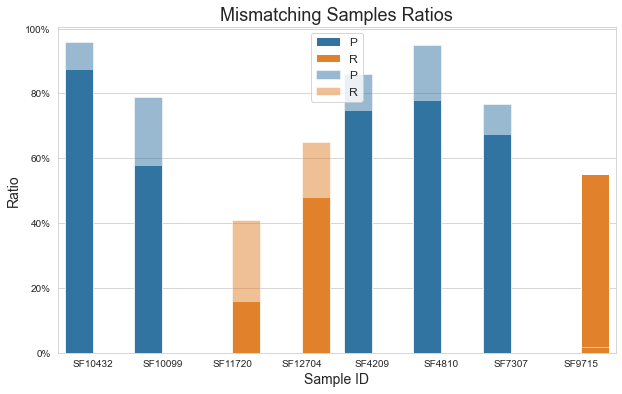

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=mismatching_df, x=mismatching_df.index, y='published_ratio', hue='type', ax=ax)
sns.barplot(data=mismatching_df, x=mismatching_df.index, y='post_filter_ratio', hue='type', ax=ax, alpha=0.5)

ax.set_title("Mismatching Samples Ratios", fontsize=18)
ax.set_xlabel("Sample ID", fontsize=14)
ax.set_ylabel("Ratio", fontsize=14)
ax.legend(fontsize=12)

# set y-axis tick format to percentage
ax.yaxis.set_major_formatter('{x:.0%}')

plt.show()


In [36]:
print(type(mismatching_df.index))

<class 'pandas.core.indexes.base.Index'>


In [ ]:
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.set_figure_params(dpi=150, fontsize=10, dpi_save=600)

'SF10099','SF10099_batch2','SF4209','SF4209_batch2','SF4810','SF4810_batch2','SF7307','SF7307_batch2',
'SF11720','SF11720_batch2','SF10565','SF10565_batch2','SF12165','SF4449'

In [10]:
all_df = pd.read_excel('/Users/lidiayung/project/resource/ratio.xlsx')
print(all_df)

   Samples  percentage
0    10022       81.25
1    10099       56.25
2    10127       83.00
3    10432       87.50
4    10857       93.75
..     ...         ...
82    4324       24.50
83   11981       81.25
84   12754       25.00
85    9871        0.00
86    4449        0.00

[87 rows x 2 columns]


In [11]:
all_df['Samples'] =all_df['Samples'].astype(str)
all_df['Samples'] =all_df['Samples'].apply(lambda x: 'SF' + x)
print(all_df)

    Samples  percentage
0   SF10022       81.25
1   SF10099       56.25
2   SF10127       83.00
3   SF10432       87.50
4   SF10857       93.75
..      ...         ...
82   SF4324       24.50
83  SF11981       81.25
84  SF12754       25.00
85   SF9871        0.00
86   SF4449        0.00

[87 rows x 2 columns]


In [17]:
all_df.rename(columns={'Samples':'Sample#'},inplace=True)
all_df.to_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/all_measured.pkl')

In [24]:
all_df=pd.read_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/all_measured.pkl')

In [174]:
all_df.rename(columns={'Sample#':'Sample'},inplace=True)

In [175]:
all_df

,Sample,percentage
0,SF10022,81.25
1,SF10099,56.25
2,SF10127,83.00
3,SF10432,87.50
4,SF10857,93.75
...,...,...
82,SF4324,24.50
83,SF11981,81.25
84,SF12754,25.00
85,SF9871,0.00


In [3]:
file ='/Users/lidiayung/github/notebooks/GBM/calculation/null_results.pkl'
null_results = pd.read_pickle(file)

In [20]:
#df.rename(columns={'old_name': 'new_name'}, inplace=True)
null_results.rename(columns={'Sample':'Sample#'},inplace=True)
null_results.to_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/null_results.pkl')

In [15]:
file = "/Users/lidiayung/project/resource/GSE174554_Tumor_normal_metadata.txt"
metadata= pd.read_csv(file,sep=' ')
metadata.head()

,Sample#,Barcode,Tumor_Normal_annotation
0,SF10022,CTATCTAAGCAAGCCA,Tumor
1,SF10022,AAACCCAGTCTACGAT,Normal
2,SF10022,AAAGGGCTCACCCTGT,Normal
3,SF10022,AACAACCAGACCCGCT,Normal
4,SF10022,AACAAGAGTGTAAACA,Normal


In [154]:
n_results=pd.read_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/null_results.pkl')
n_results

,Sample#,Post-filtering,Percentage
4,SF2777,0/3708,0.00%
8,SF3996,0/405,0.00%
11,SF4849,0/534,0.00%
14,SF10857,0/2236,0.00%
19,SF11815,0/3332,0.00%
20,SF11873,0/3130,0.00%
21,SF11916,0/987,0.00%
26,SF10514,0/3355,0.00%
35,SF12594,0/3753,0.00%
37,SF12774,0/3497,0.00%


In [156]:
names = n_results['Sample#'].to_list()
print(names)

['SF2777', 'SF3996', 'SF4849', 'SF10857', 'SF11815', 'SF11873', 'SF11916', 'SF10514', 'SF12594', 'SF12774', 'SF1343', 'SF2628', 'SF7025', 'SF7388', 'SF9791', 'SF6118', 'SF4324', 'SF11981', 'SF9372', 'SF10108']


In [115]:
new_row = [{'Sample#': 'SF2777', 'Post-filtering': '3323/385','Percentage':'89.62%'},
           {'Sample#': 'SF3996v2', 'Post-filtering': '294/111','Percentage':'72.59%'},
           {'Sample#': 'SF4849', 'Post-filtering': '471/63','Percentage':'88.20%'},
           {'Sample#': 'SF11815v2', 'Post-filtering': '3060/272','Percentage':'91.84%'},
           {'Sample#': 'SF11916v2', 'Post-filtering': '916/71','Percentage':'92.81%'},
           {'Sample#': 'SF10514', 'Post-filtering': '2934/421','Percentage':'87.45%'},
           {'Sample#': 'SF12594', 'Post-filtering': '2043/1710','Percentage':'54.44%'},
           {'Sample#': 'SF12774', 'Post-filtering': '443/3054','Percentage':'12.67%'},
           {'Sample#': 'SF1343', 'Post-filtering': '2021/688','Percentage':'74.60%'},
           {'Sample#': 'SF2628', 'Post-filtering': '1958/578','Percentage':'77.21%'},
           {'Sample#': 'SF7025v2', 'Post-filtering': '77/72','Percentage':'51.68%'},     
           {'Sample#': 'SF7388', 'Post-filtering': '2868/1659','Percentage':'63.35%'}, 
           {'Sample#': 'SF9791', 'Post-filtering': '1336/268', 'Percentage': '83.29%'},
           {'Sample#': 'SF6118', 'Post-filtering': '0/3', 'Percentage': '0.00%'},
           {'Sample#': 'SF6118v2', 'Post-filtering': '133/357', 'Percentage': '27.14%'},
           {'Sample#': 'SF4324v2', 'Post-filtering': '886/2779', 'Percentage': '24.17%'},
           {'Sample#': 'SF9372', 'Post-filtering': '3345/736', 'Percentage': '81.97%'},
           {'Sample#': 'SF10108', 'Post-filtering': '77/72','Percentage':'51.68%'},
           {'Sample#': 'SF10108', 'Post-filtering': '2821/1584', 'Percentage': '64.04%'}]
           
#drop 3996 7025
           

n_results = n_results.append(new_row, ignore_index=True)


/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_18218/1304301052.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  n_results = n_results.append(new_row, ignore_index=True)


In [150]:
type(new_row)

list

In [ ]:
SF3996
SF10857
SF11815
SF11873
SF11916
SF7025
SF4324
SF11981
SF6118

In [153]:
n_results

,Post-filtering,Percentage
Sample,,
SF3996,0/405,0.00%
SF10857,0/2236,0.00%
SF11815,0/3332,0.00%
SF11873,0/3130,0.00%
SF11916,0/987,0.00%
SF7025,0/149,0.00%
SF4324,0/3665,0.00%
SF11981,0/1107,0.00%
SF2777,3323/385,89.62%


In [117]:
n_results = n_results.drop_duplicates(subset=['Sample#'], keep='last')

In [118]:
print(len(n_results))
n_results 

26


,Sample#,Post-filtering,Percentage
1,SF3996,0/405,0.00%
3,SF10857,0/2236,0.00%
4,SF11815,0/3332,0.00%
5,SF11873,0/3130,0.00%
6,SF11916,0/987,0.00%
12,SF7025,0/149,0.00%
16,SF4324,0/3665,0.00%
17,SF11981,0/1107,0.00%
20,SF2777,3323/385,89.62%
21,SF3996v2,294/111,72.59%


In [123]:
to_null= n_results['Sample#'].iloc[0:8].to_list()
type(to_null)

list

In [125]:
n_results.to_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/null_corrected.pkl')

In [ ]:
#integrate all data into one df

In [134]:
all_data = pd.read_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/results_all.pkl')

In [135]:
all_data

,Sample,Post-filtering,Percentage
0,SF11977,215/638,25.21%
1,SF1199,111/11,90.98%
2,SF12707,1120/44,96.22%
3,SF2501,231/92,71.52%
4,SF2777,0/3708,0.00%
...,...,...,...
75,SF9798,3849/200,95.06%
76,SF10592,296/1037,22.21%
77,SF10108,0/4405,0.00%
78,SF10433,502/670,42.83%


In [141]:
n_results.rename(columns={'Sample#':'Sample'},inplace=True)

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_18218/95176558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_results.rename(columns={'Sample#':'Sample'},inplace=True)


In [144]:
n_results

,Sample,Post-filtering,Percentage
1,SF3996,0/405,0.00%
3,SF10857,0/2236,0.00%
4,SF11815,0/3332,0.00%
5,SF11873,0/3130,0.00%
6,SF11916,0/987,0.00%
12,SF7025,0/149,0.00%
16,SF4324,0/3665,0.00%
17,SF11981,0/1107,0.00%
20,SF2777,3323/385,89.62%
21,SF3996v2,294/111,72.59%


In [147]:
all_data.set_index('Sample', inplace=True)
n_results.set_index('Sample', inplace=True)

all_data.update(n_results)
all_data.reset_index(inplace=True)

In [148]:
all_data

,Sample,Post-filtering,Percentage
0,SF11977,215/638,25.21%
1,SF1199,111/11,90.98%
2,SF12707,1120/44,96.22%
3,SF2501,231/92,71.52%
4,SF2777,3323/385,89.62%
...,...,...,...
75,SF9798,3849/200,95.06%
76,SF10592,296/1037,22.21%
77,SF10108,2821/1584,64.04%
78,SF10433,502/670,42.83%


In [194]:
to_plot.to_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/integrated_df.pkl')


In [397]:
to_plot= pd.read_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/integrated_df.pkl')

In [398]:
to_plot

,Sample,Post-filtering,Percentage,Sum,percentage
0,SF11977,215/638,25.21,853,25.000000
1,SF1199,111/11,90.98,122,91.666667
2,SF12707,1120/44,96.22,1164,96.875000
3,SF2501,231/92,71.52,323,70.625000
4,SF2777,3323/385,89.62,3708,90.630000
...,...,...,...,...,...
75,SF9798,3849/200,95.06,4049,93.750000
76,SF10592,296/1037,22.21,1333,23.000000
77,SF10108,2821/1584,64.04,4405,59.000000
78,SF10433,502/670,42.83,1172,17.500000


In [403]:
to_join = pd.read_excel('/Users/lidiayung/project/resource/descriptive.xlsx')

In [404]:
to_join

,ID,Stage,Pair#,Diagnosis,Age,Sex,Tumor site,IDH,Elapsed time to recurrence,Overall survival,snRNA-seq,snATAC-seq,RNA-exome,Spatial RNA,Spatial protein
0,SF10022,Primary,1,Glioblastoma,65.0,M,R-TEMPORAL,IDH wildtype,NaN,496.0,Y,NaN,NaN,NaN,NaN
1,SF10484,Recurrent,1,Glioblastoma,67.0,M,TEMPORAL,IDH wildtype,419.0,496.0,Y,NaN,NaN,NaN,NaN
2,SF10099,Primary,2,Glioblastoma,55.0,M,L-TEMPORAL,IDH wildtype,NaN,462.0,Y,NaN,NaN,NaN,NaN
3,SF10441,Recurrent,2,Glioblastoma,56.0,M,TEMPORAL,IDH wildtype,NaN,462.0,Y,NaN,NaN,NaN,NaN
4,SF10127,Primary,3,Glioblastoma,44.0,F,R-FRONTAL,IDH wildtype,NaN,560.0,Y,NaN,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,SF10750,Primary,RNAexome#4,Glioblastoma,49.0,M,NaN,IDH wildtype,NaN,NaN,NaN,NaN,Y,NaN,NaN
107,SF10497,Recurrent,RNAexome#23,Glioblastoma,60.0,F,NaN,IDH wildtype,823.0,NaN,NaN,NaN,Y,NaN,NaN
108,SF10228,Recurrent,RNAexome#15,Glioblastoma,60.0,F,NaN,IDH wildtype,544.0,NaN,NaN,NaN,Y,NaN,NaN
109,SF10064,Recurrent,RNAexome#5,Glioblastoma,58.0,M,NaN,IDH wildtype,659.0,NaN,NaN,NaN,Y,NaN,NaN


In [411]:
df_select = to_join.iloc[:, [0, 1, 2, 4, 5]]

In [412]:
df_select

,ID,Stage,Pair#,Age,Sex
0,SF10022,Primary,1,65.0,M
1,SF10484,Recurrent,1,67.0,M
2,SF10099,Primary,2,55.0,M
3,SF10441,Recurrent,2,56.0,M
4,SF10127,Primary,3,44.0,F
...,...,...,...,...,...
106,SF10750,Primary,RNAexome#4,49.0,M
107,SF10497,Recurrent,RNAexome#23,60.0,F
108,SF10228,Recurrent,RNAexome#15,60.0,F
109,SF10064,Recurrent,RNAexome#5,58.0,M


In [415]:
df_select.rename(columns={'ID':'Sample'},inplace= True)

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_18218/1000088995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.rename(columns={'ID':'Sample'},inplace= True)


###### integrated_to_plot = to_plot.merge(df_select, on='Sample',how='left')
integrated_to_plot

In [418]:
integrated_to_plot.to_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/integrated_to_plot.pkl')

In [430]:
recurrent = integrated_to_plot[(integrated_to_plot['Stage']=='Recurrent')& 
                             (integrated_to_plot['Pair#'].notnull())]
recurrent

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
25,SF10484,1449/1475,49.56,2924,50.00,Recurrent,1,67.0,M
27,SF11248,906/982,47.99,1888,48.00,Recurrent,4,52.0,F
28,SF11720,630/906,41.02,1536,20.00,Recurrent,37,56.0,M
29,SF11857,157/3236,4.63,3393,6.00,Recurrent,5,69.0,M
30,SF12008,1488/1242,54.51,2730,52.00,Recurrent,33,54.0,M
32,SF12382,1678/380,81.54,2058,82.00,Recurrent,31,72.0,M
34,SF12460,1602/2654,37.64,4256,32.50,Recurrent,7,40.0,F
38,SF1343,2021/688,74.60,2709,75.00,Recurrent,8,57.0,M
39,SF2628,1958/578,77.21,2536,75.70,Recurrent,10,45.0,F
40,SF2979,3028/1247,70.83,4275,66.50,Recurrent,11,30.0,F


In [441]:
len(recurrent)

38

In [431]:
primary = integrated_to_plot[(integrated_to_plot['Stage']=='Primary')& 
                             (integrated_to_plot['Pair#'].notnull())]
primary

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
1,SF1199,111/11,90.98,122,91.666667,Primary,8,57.0,M
3,SF2501,231/92,71.52,323,70.625000,Primary,10,55.0,F
4,SF2777,3323/385,89.62,3708,90.630000,Primary,11,29.0,F
5,SF2990,1471/427,77.50,1898,78.000000,Primary,12,71.0,F
6,SF3076,2332/882,72.56,3214,70.000000,Primary,13,25.0,M
7,SF3391,6160/667,90.23,6827,90.630000,Primary,14,56.0,F
8,SF3996,0/405,0.00,405,75.000000,Primary,15,44.0,F
9,SF4209,633/102,86.12,735,74.000000,Primary,30,57.0,F
10,SF4810,499/27,94.87,526,81.250000,Primary,18,59.0,F
11,SF4849,471/63,88.20,534,80.000000,Primary,19,62.0,M


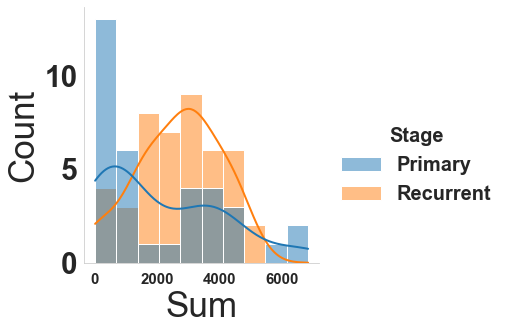

In [460]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 5,
    "xtick.major.pad": 5,
    "xtick.labelsize": 15,
    "grid.color": "0.3",
    "grid.linestyle": "-",
    "grid.linewidth": 3,
    "lines.linewidth": 2,
    "lines.color": "g",
})
sns.displot(integrated_to_plot, x='Sum', hue='Stage', kde=True, bins=10)

plt.grid(False)

In [4]:
paired_to_plot = integrated_to_plot[integrated_to_plot['Pair#'].notnull()]


In [5]:
ordered=paired_to_plot.sort_values('Pair#',ascending=True)

In [534]:
to_process=ordered['Sample'].to_list()
print(to_process)

['SF10484', 'SF10441', 'SF10099', 'SF10565', 'SF11248', 'SF10432', 'SF10592', 'SF11857', 'SF11488', 'SF11082', 'SF12460', 'SF11344', 'SF1343', 'SF1199', 'SF11780', 'SF12243', 'SF2628', 'SF2501', 'SF2979', 'SF2777', 'SF2990', 'SF3073', 'SF3076', 'SF3243', 'SF3448', 'SF3391', 'SF3996', 'SF4449', 'SF6621', 'SF6186', 'SF6098', 'SF4810', 'SF6118', 'SF4849', 'SF5581', 'SF5581', 'SF9715', 'SF6809', 'SF7025', 'SF6809', 'SF7062', 'SF7307', 'SF7307', 'SF7388', 'SF12165', 'SF9510', 'SF9962', 'SF9358', 'SF9798', 'SF9494', 'SF10108', 'SF9871', 'SF9372', 'SF10433', 'SF4324', 'SF4209', 'SF11916', 'SF12382', 'SF11815', 'SF12408', 'SF10857', 'SF12008', 'SF12751', 'SF12115', 'SF11981', 'SF11587', 'SF12754', 'SF12407', 'SF11873', 'SF11720']


In [535]:
processed = ['SF2990','SF3073','SF11344','SF12460','SF11916','SF12382']

In [541]:
intersection = [item for item in to_process if item not in processed]
print(intersection)

['SF10484', 'SF10441', 'SF10099', 'SF10565', 'SF11248', 'SF10432', 'SF10592', 'SF11857', 'SF11488', 'SF11082', 'SF1343', 'SF1199', 'SF11780', 'SF12243', 'SF2628', 'SF2501', 'SF2979', 'SF2777', 'SF3076', 'SF3243', 'SF3448', 'SF3391', 'SF3996', 'SF4449', 'SF6621', 'SF6186', 'SF6098', 'SF4810', 'SF6118', 'SF4849', 'SF5581', 'SF5581', 'SF9715', 'SF6809', 'SF7025', 'SF6809', 'SF7062', 'SF7307', 'SF7307', 'SF7388', 'SF12165', 'SF9510', 'SF9962', 'SF9358', 'SF9798', 'SF9494', 'SF10108', 'SF9871', 'SF9372', 'SF10433', 'SF4324', 'SF4209', 'SF11815', 'SF12408', 'SF10857', 'SF12008', 'SF12751', 'SF12115', 'SF11981', 'SF11587', 'SF12754', 'SF12407', 'SF11873', 'SF11720']


In [542]:
len(intersection)

64

In [538]:
intersection = set(to_process).intersection(processed)

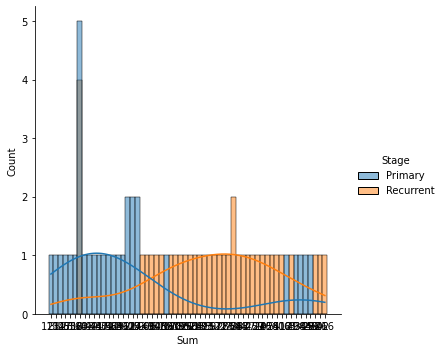

In [6]:
sns.displot(paired_to_plot, x='Sum', hue='Stage', kde=True, bins=10)

plt.grid(False)

In [7]:
less_than_1000 = paired_to_plot[paired_to_plot['Sum']<1000]
sns.displot(less_than_1000, x='Sum', hue='Pair#', height=8, aspect=2, kde=True, bins=3)
plt.grid(False)

TypeError: '<' not supported between instances of 'str' and 'int'

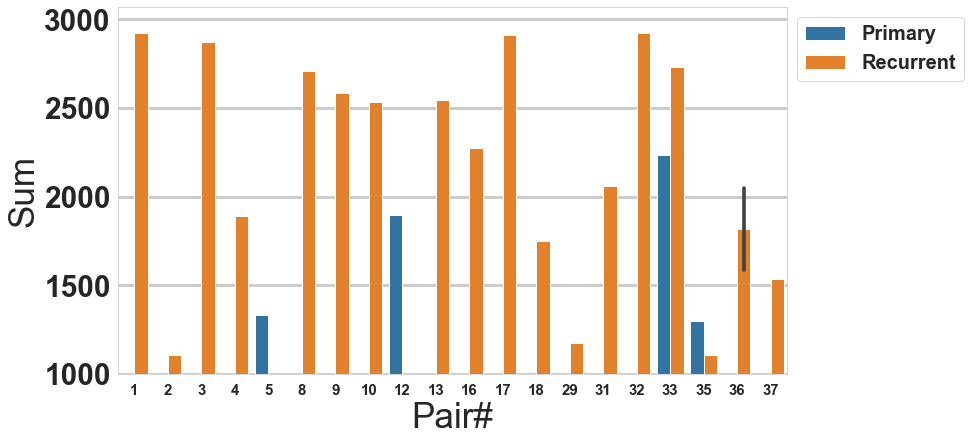

In [571]:
between_3k_1k = paired_to_plot[(paired_to_plot['Sum']>=1000)&(paired_to_plot['Sum']<3000)]
sns.set_style("whitegrid")
sns.barplot(data=between_3k_1k,y=between_3k_1k['Sum'], x=between_3k_1k['Pair#'],hue='Stage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(1000)
plt.show()

In [ ]:
paired_to_plot = integrated_to_plot

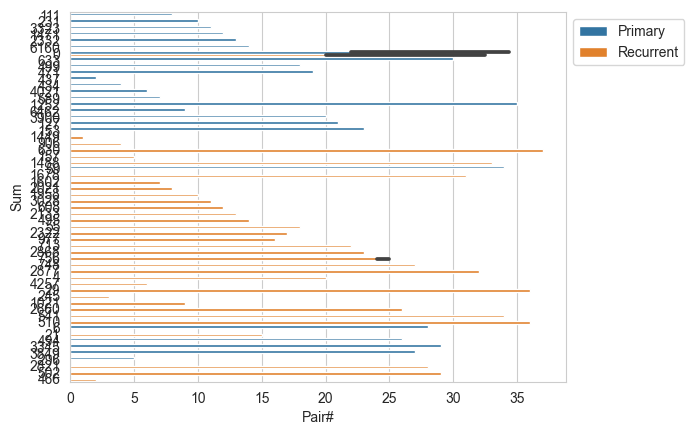

In [8]:
sns.set_style("whitegrid")
sns.barplot(data=paired_to_plot,y=paired_to_plot['Sum'], x=paired_to_plot['Pair#'],hue='Stage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

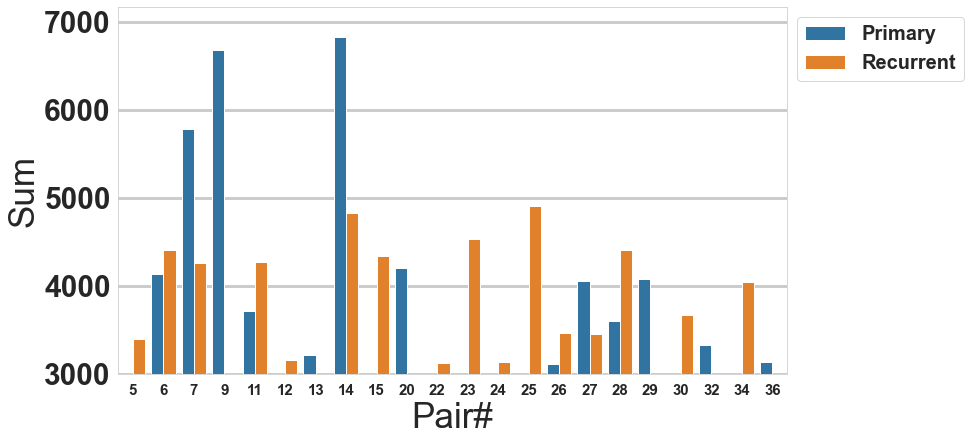

In [523]:
no_less_3000 = paired_to_plot[paired_to_plot['Sum']>=3000]
sns.set_style("whitegrid")
sns.barplot(data=no_less_3000,y=no_less_3000['Sum'], x=no_less_3000['Pair#'],hue='Stage')
plt.ylim(3000)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

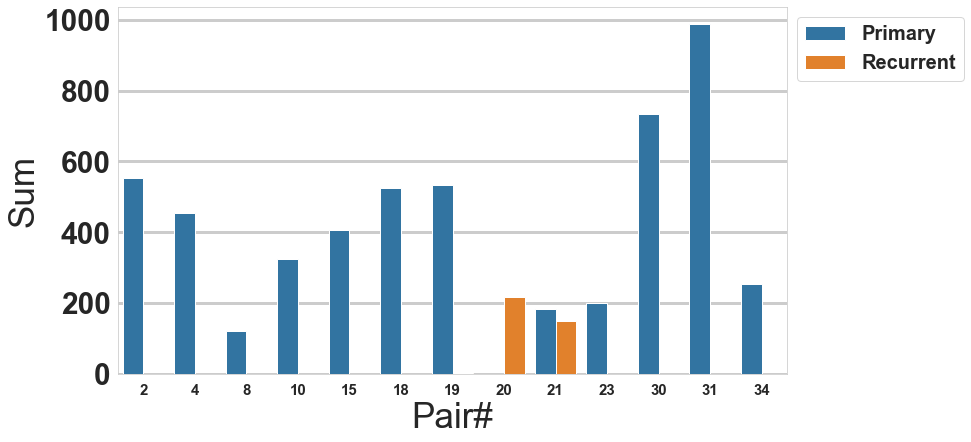

In [518]:
sns.set_style("whitegrid")
sns.barplot(data=less_than_1000,y=less_than_1000['Sum'], x=less_than_1000['Pair#'],hue='Stage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.barplot(data=less_than_1000,y=less_than_1000['Sum'], x=less_than_1000['Pair#'],hue='Stage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

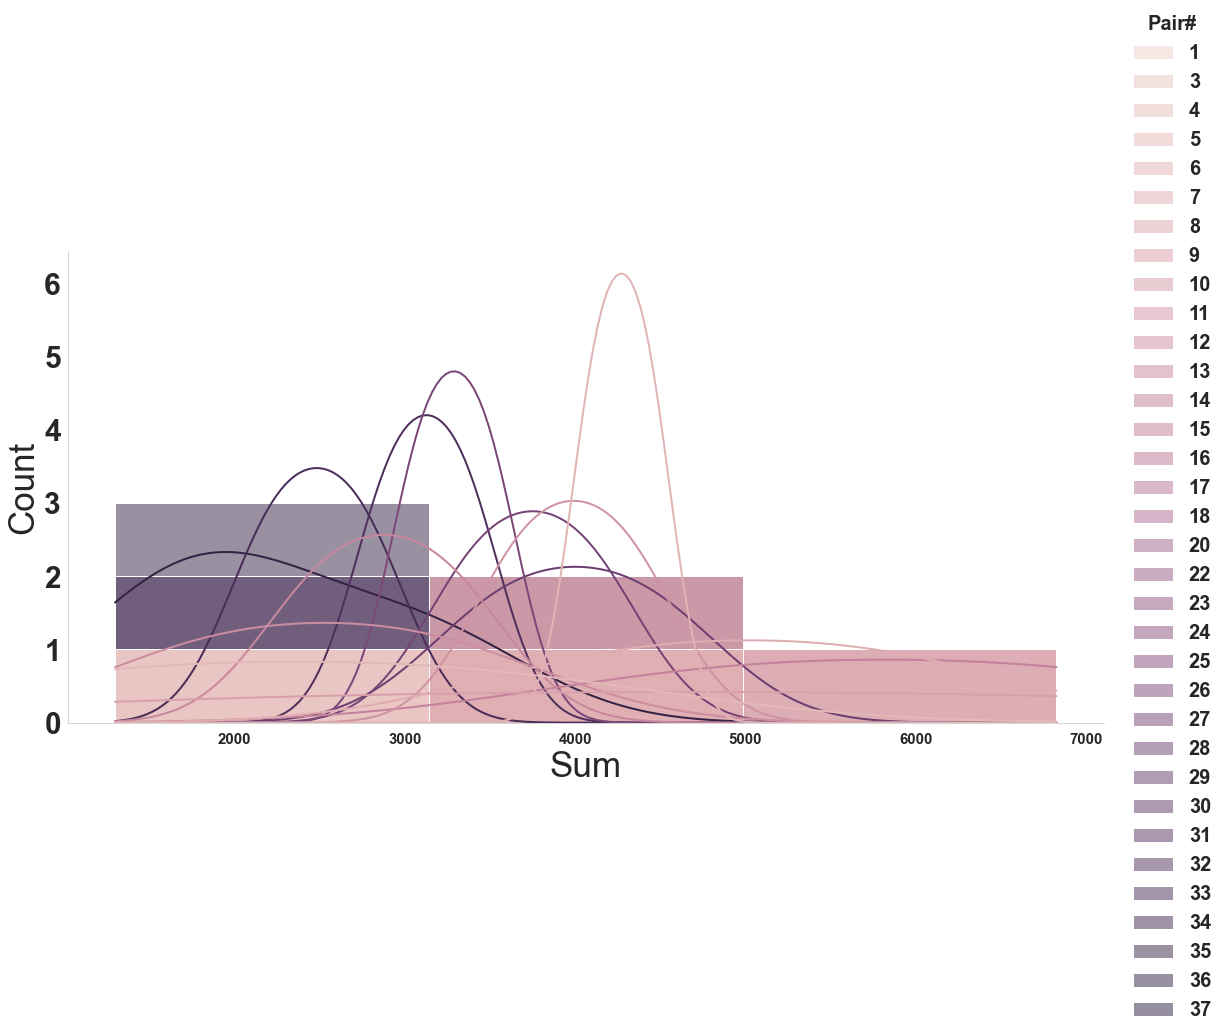

In [493]:
greater_than_1200 = paired_to_plot[paired_to_plot['Sum']>=1200]
sns.displot(greater_than_1200, x='Sum', hue='Pair#', height=8, aspect=2, kde=True, bins=3)
plt.grid(False)

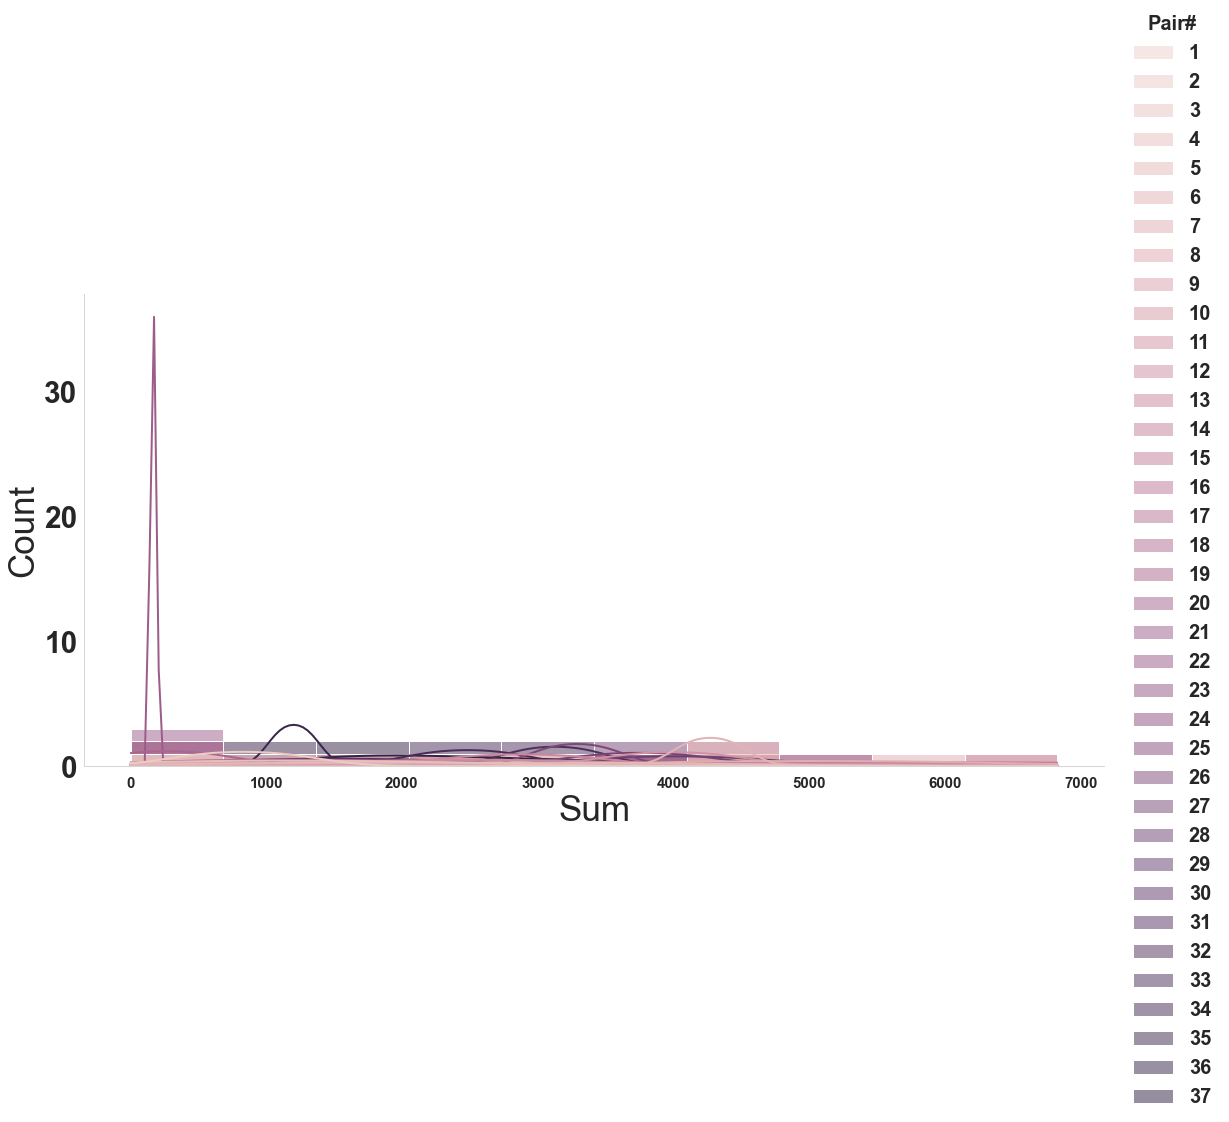

In [477]:

sns.displot(paired_to_plot, x='Sum', hue='Pair#', height=8, aspect=2, kde=True, bins=10)
ax.set_xlim(500)
plt.grid(False)

In [466]:
#sns.histplot(paired_to_plot, x='Sum', hue='Pair#', kde=True)

In [3]:
integrated_to_plot=pd.read_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/integrated_to_plot.pkl')
integrated_to_plot['Sum'] = integrated_to_plot['Post-filtering'].str.split('/').str[0]
integrated_to_plot

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF11977,215/638,25.21,215,25.000000,Primary,NaN,61.0,F
1,SF1199,111/11,90.98,111,91.666667,Primary,8,57.0,M
2,SF12707,1120/44,96.22,1120,96.875000,Primary,NaN,83.0,F
3,SF2501,231/92,71.52,231,70.625000,Primary,10,55.0,F
4,SF2777,3323/385,89.62,3323,90.630000,Primary,11,29.0,F
...,...,...,...,...,...,...,...,...,...
75,SF9798,3849/200,95.06,3849,93.750000,Primary,27,64.0,M
76,SF10592,296/1037,22.21,296,23.000000,Primary,5,66.0,M
77,SF10108,2821/1584,64.04,2821,59.000000,Recurrent,28,47.0,M
78,SF10433,502/670,42.83,502,17.500000,Recurrent,29,53.0,F


In [543]:
integrated_to_plot=pd.read_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/integrated_to_plot.pkl')
integrated_to_plot['Sum'] = integrated_to_plot['Post-filtering'].apply(sum_func)
integrated_to_plot

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF11977,215/638,25.21,853,25.000000,Primary,NaN,61.0,F
1,SF1199,111/11,90.98,122,91.666667,Primary,8,57.0,M
2,SF12707,1120/44,96.22,1164,96.875000,Primary,NaN,83.0,F
3,SF2501,231/92,71.52,323,70.625000,Primary,10,55.0,F
4,SF2777,3323/385,89.62,3708,90.630000,Primary,11,29.0,F
...,...,...,...,...,...,...,...,...,...
75,SF9798,3849/200,95.06,4049,93.750000,Primary,27,64.0,M
76,SF10592,296/1037,22.21,1333,23.000000,Primary,5,66.0,M
77,SF10108,2821/1584,64.04,4405,59.000000,Recurrent,28,47.0,M
78,SF10433,502/670,42.83,1172,17.500000,Recurrent,29,53.0,F


In [548]:
sorted_int= integrated_to_plot.sort_values('Pair#',ascending=True)

In [170]:
sum_func = lambda x: int(x.split('/')[0]) + int(x.split('/')[1])
all_data['Sum'] = all_data['Post-filtering'].apply(sum_func)

In [172]:
all_data

,Sample,Post-filtering,Percentage,Sum
0,SF11977,215/638,25.21%,853
1,SF1199,111/11,90.98%,122
2,SF12707,1120/44,96.22%,1164
3,SF2501,231/92,71.52%,323
4,SF2777,3323/385,89.62%,3708
...,...,...,...,...
75,SF9798,3849/200,95.06%,4049
76,SF10592,296/1037,22.21%,1333
77,SF10108,2821/1584,64.04%,4405
78,SF10433,502/670,42.83%,1172


In [190]:
to_plot = all_data.merge(all_df, on ='Sample',how ='left')



In [327]:
to_plot['difference'] = abs(to_plot['Percentage']-to_plot['percentage'])



In [394]:
greater_than_5.sort_values('Percentage',ascending= True)



,Sample,Post-filtering,Percentage,Sum,percentage,difference
8,SF3996,0/405,0.00,405,75.000000,75.000000
66,SF11981,0/1107,0.00,1107,81.250000,81.250000
65,SF4324,0/3665,0.00,3665,24.500000,24.500000
59,SF6118,0/3,0.00,3,22.250000,22.250000
14,SF10857,0/2236,0.00,2236,93.750000,93.750000
19,SF11815,0/3332,0.00,3332,89.583333,89.583333
20,SF11873,0/3130,0.00,3130,6.000000,6.000000
21,SF11916,0/987,0.00,987,93.750000,93.750000
47,SF7025,0/149,0.00,149,50.000000,50.000000
54,SF9715,4/214,1.83,218,55.000000,53.170000


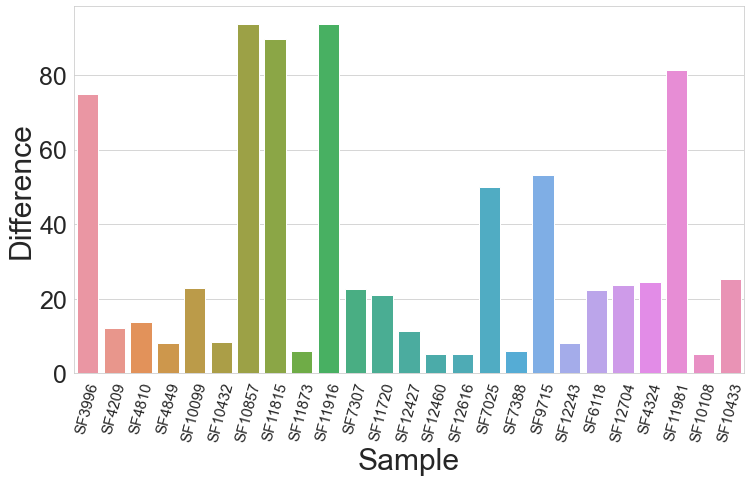

In [392]:
plt.rcParams.update({'font.size':20, 'font.family':'sans-serif', 
                            'xtick.labelsize':15, 'ytick.labelsize':25, 'figure.figsize':(12, 6.75), 
                            'axes.labelsize':30})
sns.barplot(data=greater_than_5.iloc(, x='Sample', y='difference')
plt.xticks(rotation=75)

plt.xlabel('Sample')
plt.ylabel('Difference')

plt.show()


Text(0, 0.5, '%Difference')

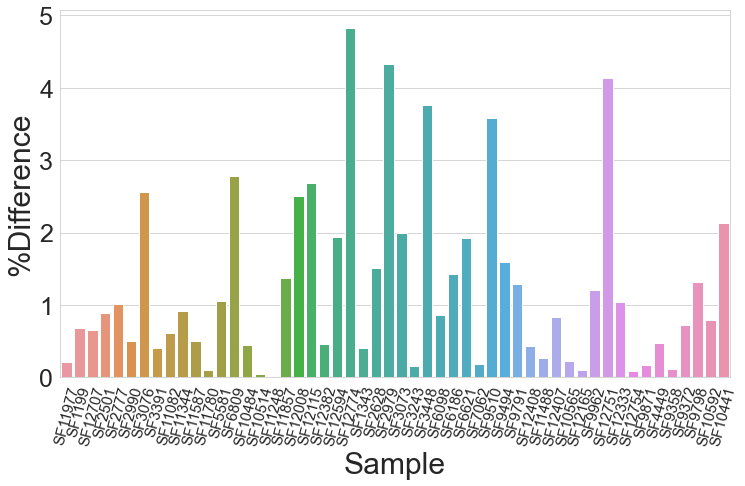

In [376]:
plt.rcParams.update({'font.size':20, 'font.family':'sans-serif', 
                            'xtick.labelsize':15, 'ytick.labelsize':25, 'figure.figsize':(12, 6.75), 
                            'axes.labelsize':30})
sns.barplot(data=less_than_or_equal_to_5, x= 'Sample', y= 'difference')
plt.xticks(rotation=75)
plt.xlabel('Sample')
plt.ylabel('%Difference')

In [395]:
less_than_or_equal_to_5

,Sample,Post-filtering,Percentage,Sum,percentage,difference
0,SF11977,215/638,25.21,853,25.000000,0.210000
1,SF1199,111/11,90.98,122,91.666667,0.686667
2,SF12707,1120/44,96.22,1164,96.875000,0.655000
3,SF2501,231/92,71.52,323,70.625000,0.895000
4,SF2777,3323/385,89.62,3708,90.630000,1.010000
5,SF2990,1471/427,77.50,1898,78.000000,0.500000
6,SF3076,2332/882,72.56,3214,70.000000,2.560000
7,SF3391,6160/667,90.23,6827,90.630000,0.400000
15,SF11082,4021/111,97.31,4132,97.916667,0.606667
16,SF11344,589/5194,10.19,5783,11.111111,0.921111


In [338]:
greater_than_5

,Sample,Post-filtering,Percentage,Sum,percentage,difference
8,SF3996,0/405,0.00,405,75.000000,75.000000
9,SF4209,633/102,86.12,735,74.000000,12.120000
10,SF4810,499/27,94.87,526,81.250000,13.620000
11,SF4849,471/63,88.20,534,80.000000,8.200000
12,SF10099,437/116,79.02,553,56.250000,22.770000
13,SF10432,434/19,95.81,453,87.500000,8.310000
14,SF10857,0/2236,0.00,2236,93.750000,93.750000
19,SF11815,0/3332,0.00,3332,89.583333,89.583333
20,SF11873,0/3130,0.00,3130,6.000000,6.000000
21,SF11916,0/987,0.00,987,93.750000,93.750000


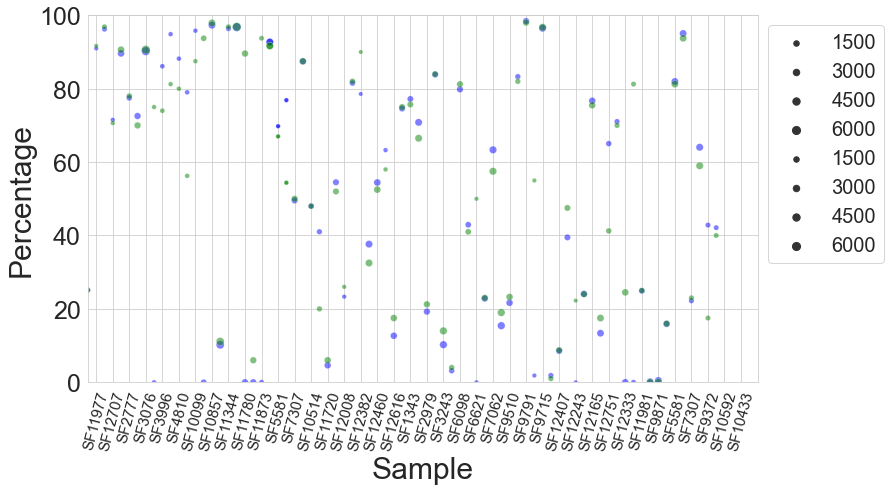

In [380]:
fig,ax=plt.subplots()

sns.scatterplot(data=to_plot, x='Sample', y='Percentage', size='Sum',alpha = 0.5, color = 'blue')
sns.scatterplot(data=to_plot, x='Sample', y='percentage', size='Sum',alpha = 0.5, color = 'green')



ax.set_xlim(0, len(to_plot['Sample']) + 1) # Set x-axis limits
ax.set_ylim(0, 100) # Set y-axis limits

x_ticks = range(1, len(to_plot['Sample']) + 1, 2) # Set tick locations at every other position
ax.set_xticks(x_ticks)
ax.set_xticklabels(to_plot['Sample'][np.array(x_ticks) - 1], rotation=75) # Set tick labels at every other position

plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) # Move legend to upper left corner

plt.show()

In [ ]:
'SF3076' 'SF11873''SF11344'

to_plot['Percentage'] = to_plot['Percentage'].str.strip('%').astype(float)

### Divide the values by 100 to convert them to decimal format
to_plot['Percentage'] = to_plot['Percentage'] 


In [210]:
group_a = to_plot[['Sample', 'Percentage', 'Sum']]

In [212]:
group_b = to_plot[['Sample', 'percentage', 'Sum']]

In [229]:
group_b.rename(columns = {'percentage':'Percentage'},inplace=True )
group_b

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_18218/4118102282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b.rename(columns = {'percentage':'Percentage'},inplace=True )


,Sample,Percentage,Sum
0,SF11977,25.000000,853
1,SF1199,91.666667,122
2,SF12707,96.875000,1164
3,SF2501,70.625000,323
4,SF2777,90.630000,3708
...,...,...,...
75,SF9798,93.750000,4049
76,SF10592,23.000000,1333
77,SF10108,59.000000,4405
78,SF10433,17.500000,1172


In [286]:
df = pd.concat([group_a, group_b], ignore_index=True)
df

,Sample,Percentage,Sum
0,SF11977,25.21,853
1,SF1199,90.98,122
2,SF12707,96.22,1164
3,SF2501,71.52,323
4,SF2777,89.62,3708
...,...,...,...
155,SF9798,93.75,4049
156,SF10592,23.00,1333
157,SF10108,59.00,4405
158,SF10433,17.50,1172


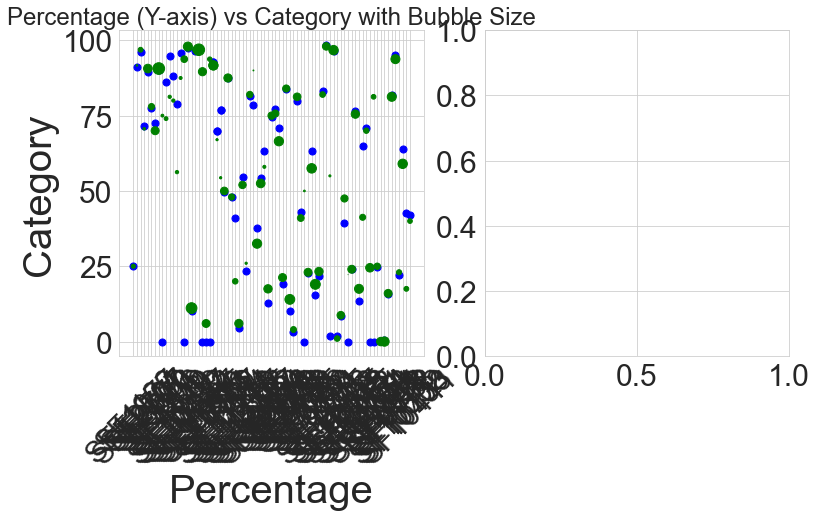

In [336]:


# create figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# create scatter plot on first axis
axs[0].scatter(group_a['Sample'], group_a['Percentage'], s=50, c='blue')

# set axis labels and title for first axis
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Percentage')
axs[0].set_title('Category vs Percentage (X-axis)')

# create scatter plot on second axis
axs[0].scatter(group_b['Sample'], group_b['Percentage'], s=group_b['Sum']/50, c='green')

# set axis labels and title for second axis
axs[0].set_xlabel('Percentage')
axs[0].set_ylabel('Category')
axs[0].set_title('Percentage (Y-axis) vs Category with Bubble Size')

# set rotation for x-axis labels on first axis
axs[0].tick_params(axis='x', rotation=45)

# show plot
plt.show()


In [34]:
to_correct_sample_umi = null_results['Sample#'].to_list()
to_correct_sample_umi

['SF2777',
 'SF3996',
 'SF4849',
 'SF10857',
 'SF11815',
 'SF11873',
 'SF11916',
 'SF10514',
 'SF12594',
 'SF12774',
 'SF1343',
 'SF2628',
 'SF7025',
 'SF7388',
 'SF9791',
 'SF6118',
 'SF4324',
 'SF11981',
 'SF9372',
 'SF10108']

In [67]:
#B[B['Name'].isin(A)]

to_correct = metadata[metadata['Sample#'].isin(to_correct_sample_umi)]
to_correct

,Sample#,Barcode,Tumor_Normal_annotation
167458,SF6118,CTCCATGTCGATGCAT,Normal
167459,SF6118,GGGCCATCAGCAGATG,Tumor
167460,SF6118,TTAATCCCATTGCCGG,Normal
167466,SF6118,AAAGGGCTCATAGCAC,Tumor
167467,SF6118,AAATGGAAGTCATGGG,Tumor
...,...,...,...
252675,SF12774,GATCACAGTCTACAAC,Normal
252676,SF12774,GGTGTTAGTGTGTCCG,Normal
252677,SF12774,TGATCAGGTGAGCGAT,Normal
252678,SF12774,TTGCCTGCATCGAACT,Normal


In [82]:
samples = to_correct['Sample#'].unique().tolist()
samples

['SF6118',
 'SF2777',
 'SF10514',
 'SF1343',
 'SF10108',
 'SF2628',
 'SF4849',
 'SF12594',
 'SF12774']

In [62]:
first_rows= to_correct.groupby('Sample#').first()
print(first_rows)

                    Barcode Tumor_Normal_annotation
Sample#                                            
SF10108  AAAGAACCAGTAGAGC.1                  Normal
SF10514  GTTCTATAGCAGGCTA.1                  Normal
SF12594    AACAACCCAGTAGTGG                  Normal
SF12774    AAACGAAGTCATGCAT                  Normal
SF1343   CCCATTGAGATGACAT.1                  Normal
SF2628   ATGGGTTAGCAATAAC.1                  Normal
SF2777   AAACGCTAGCTGTTAC.1                  Normal
SF4849   ATCTTCAGTTAAAGTG.1                   Tumor
SF6118     CTCCATGTCGATGCAT                  Normal


In [ ]:
### Notes

df['Barcode'] = df['Barcode'].str.replace('\.?\d*$', '-1')
\.: The backslash character (\) is an escape character in regular expressions, used to indicate that the following character should be interpreted literally. In this case, we want to match a literal dot character, so we use \. to escape the dot.
\d: The \d shorthand character class matches any digit (0-9).
+: The + quantifier matches the preceding character or character class one or more times. In this case, it matches one or more digits.
$: The $ anchor matches the end of the string.

In [68]:
to_correct['Barcode'] = to_correct['Barcode'].str.replace('\.\d', '')
corrected_first_rows = to_correct.groupby('Sample#').first()
print(corrected_first_rows)

                  Barcode Tumor_Normal_annotation
Sample#                                          
SF10108  AAAGAACCAGTAGAGC                  Normal
SF10514  GTTCTATAGCAGGCTA                  Normal
SF12594  AACAACCCAGTAGTGG                  Normal
SF12774  AAACGAAGTCATGCAT                  Normal
SF1343   CCCATTGAGATGACAT                  Normal
SF2628   ATGGGTTAGCAATAAC                  Normal
SF2777   AAACGCTAGCTGTTAC                  Normal
SF4849   ATCTTCAGTTAAAGTG                   Tumor
SF6118   CTCCATGTCGATGCAT                  Normal


/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_18218/1752517969.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  to_correct['Barcode'] = to_correct['Barcode'].str.replace('\.\d', '')
/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_18218/1752517969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_correct['Barcode'] = to_correct['Barcode'].str.replace('\.\d', '')


In [69]:
to_correct['Barcode'] = to_correct['Barcode']+ '-1'
corrected_first_rows = to_correct.groupby('Sample#').first()
print(corrected_first_rows)

                    Barcode Tumor_Normal_annotation
Sample#                                            
SF10108  AAAGAACCAGTAGAGC-1                  Normal
SF10514  GTTCTATAGCAGGCTA-1                  Normal
SF12594  AACAACCCAGTAGTGG-1                  Normal
SF12774  AAACGAAGTCATGCAT-1                  Normal
SF1343   CCCATTGAGATGACAT-1                  Normal
SF2628   ATGGGTTAGCAATAAC-1                  Normal
SF2777   AAACGCTAGCTGTTAC-1                  Normal
SF4849   ATCTTCAGTTAAAGTG-1                   Tumor
SF6118   CTCCATGTCGATGCAT-1                  Normal


/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_18218/3386154702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_correct['Barcode'] = to_correct['Barcode']+ '-1'


In [72]:
corrected_first_rows.to_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/updated_UMI.pkl')

In [88]:
def calculator(sample):

    # STEP 1 -> set corresponding folders which the results of each specimen are written to
    output_folder = "/Users/lidiayung/project/resource/specimens"
    resource_folder = "/Users/lidiayung/project/resource/GSE174554_RAW/"
 
    matrix_path = glob.glob(f"{resource_folder}/GSM*_{sample}_matrix.mtx.gz")[0]
    features_path = glob.glob(f"{resource_folder}/GSM*_{sample}_features.tsv.gz")[0]
    barcodes_path = glob.glob(f"{resource_folder}/GSM*_{sample}_barcodes.tsv.gz")[0]


    output_path = os.path.join(output_folder, sample)
    
    if len(features_path) == 0:
        print(f"No document found for sample {sample}")
        return None

    # End of Step 1

    # STEP 2 -> creat output documents
    # path to unfiltered loom file (this will be created in the optional steps below)
    f_loom_path_unfilt = "unfiltered.loom" # test dataset, n=500 cells
    f_loom_path_scenic = "filtered_scenic.loom"
    f_anndata_path = "anndata.h5ad"
    f_pyscenic_output = "output.loom"
    f_final_loom = 'scenic_integrated-output.loom'

    # End of Step 2

    # Step 3-> read data into anndata
    mat = scipy.io.mmread(matrix_path)
    feature_ids = [row[0] for row in csv.reader(gzip.open(features_path, mode="rt"), delimiter="\t")]
    gene_names = [row[0] for row in csv.reader(gzip.open(features_path, mode="rt"), delimiter="\t")]
    feature_types = [row[0] for row in csv.reader(gzip.open(features_path, mode="rt"), delimiter="\t")]
    barcodes = [row[0] for row in csv.reader(gzip.open(barcodes_path, mode="rt"), delimiter="\t")]
    matrix = pd.DataFrame.sparse.from_spmatrix(mat)
    matrix.columns = barcodes
    matrix=matrix.transpose() 
    matrix.columns = gene_names

    # convert the index and columns to DataFrame objects
    obs_df = matrix.index.to_frame(index=False)
    var_df = matrix.columns.to_frame(index=False)

    adata = ad.AnnData(X=matrix.values, obs=obs_df, var=var_df)


    row_attrs = {  "Gene": np.array(var_df[0]) ,}
    col_attrs = { "CellID":  np.array(matrix.index) , 
    "nGene": np.array( np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,
    "nUMI": np.array( np.sum(adata.X.transpose() , axis=0)).flatten() ,
    }
    lp.create( f_loom_path_unfilt, adata.X.transpose(), row_attrs, col_attrs )   

    # End of Step 3

    #Step 4-> Filtering cells that have >2.5% mitochondrial read counts and <200 expressed genes

    adata = sc.read_loom( f_loom_path_unfilt )
    nCountsPerGene = np.sum(adata.X, axis=0)
    nCellsPerGene = np.sum(adata.X>0, axis=0)
        
    nCells=adata.X.shape[0]

    mito_genes = adata.var_names.str.startswith('MT-')
    # for each cell compute fraction of counts in mito genes vs. all genes
    adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
    # add the total counts per cell as observations-annotation to adata
    adata.obs['n_counts'] = adata.X.sum(axis=1).A1
    
    sc.pp.filter_cells(adata, min_genes=200 )
    adata = adata[adata.obs['percent_mito'] <=0.025, :]
    #End of Step 4

    #Step 5 -> Read filtered data
    adata.write( f_anndata_path )
    # create basic row and column attributes for the loom file:
    row_attrs = {    "Gene": np.array(adata.var_names) ,}
    col_attrs = {
     "CellID": np.array(adata.obs_names) ,
     "nGene": np.array( np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,
     "nUMI": np.array( np.sum(adata.X.transpose() , axis=0)).flatten() ,
     }
    lp.create( f_loom_path_scenic, adata.X.transpose(), row_attrs, col_attrs)
    
    #End of Step 5

    #Step 6 -> integrate metadata
    file = '/Users/lidiayung/github/notebooks/GBM/calculation/updated_UMI.pkl'
    metadata= pd.read_pickle(file)
    metadata.head()
    #End of Step 6

    #Step 7 -> Calculate percentage and return the value from both pre and post data
    intersection_barcodes = set(metadata['Barcode']).intersection(adata.obs.index)
    tumor = metadata[metadata['Barcode'].isin(intersection_barcodes) & (metadata['Tumor_Normal_annotation'] == 'Tumor')]
    percentage = "{:.2%}".format(len(tumor)/len(adata.obs.nUMI))
    #print("Percentage: {:.2%}".format(len(tumor)/len(adata.obs.nUMI)))
    post_filtering = f"{len(tumor)}/{len(adata.obs.nUMI) - len(tumor)}"

    #End of Step 7


    sample_str = f"{post_filtering}"

    return (1)

In [90]:
results_sup =[]
for sample in samples:
    obtainpercentage, post_filtering = calculator(sample)
    results_sup.append((sample, obtainpercentage, post_filtering))

# Create a pandas DataFrame with the results
df_results = pd.DataFrame(results_sup, columns=['Sample', 'Post-filtering','Percentage'])
print(results_sup)

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_18218/1904989648.py:45: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=matrix.values, obs=obs_df, var=var_df)
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_18218/1904989648.py:45: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=matrix.values, obs=obs_df, var=var_df)

[('SF6118', '0/3', '0.00%'), ('SF2777', '0/3708', '0.00%'), ('SF10514', '0/3355', '0.00%'), ('SF1343', '0/2709', '0.00%'), ('SF10108', '0/4405', '0.00%'), ('SF2628', '0/2536', '0.00%'), ('SF4849', '1/533', '0.19%'), ('SF12594', '0/3753', '0.00%'), ('SF12774', '0/3497', '0.00%')]


In [387]:
metadata['Sample#'].unique()

array(['SF10022', 'SF10127', 'SF12090', 'SF4297', 'SF6996', 'SF9259R',
       'SF9259S', 'SF11979', 'SF7062', 'SF9510', 'SF4400', 'SF6621',
       'SF10484', 'SF10099', 'SF10099v2', 'SF11977', 'SF6186', 'SF9871',
       'SF6809', 'SF10441', 'SF9358', 'SF7307', 'SF7307v2', 'SF4449',
       'SF4449v2', 'SF10433v2', 'SF10433', 'SF11857', 'SF11720',
       'SF11720v2', 'SF4810', 'SF4810v2', 'SF11248', 'SF4209', 'SF4209v2',
       'SF6098', 'SF2501', 'SF1199', 'SF11587', 'SF3391', 'SF2990',
       'SF3448', 'SF3073', 'SF9494', 'SF12427', 'SF3243', 'SF12008',
       'SF5581', 'SF9798', 'SF3076', 'SF8963', 'SF12460', 'SF11344',
       'SF11082', 'SF2979', 'SF12382', 'SF10432', 'SF12408', 'SF10592',
       'SF11488', 'SF12407', 'SF10565', 'SF10565v2', 'SF12243',
       'SF12243v2', 'SF9715v2', 'SF9715', 'SF6118', 'SF6118v2', 'SF12165',
       'SF12165v2', 'SF11780', 'SF9962', 'SF2777', 'SF10514', 'SF1343',
       'SF10108', 'SF2628', 'SF4849', 'SF7388v2', 'SF7025v2', 'SF3996v2',
       'SF1191